In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
A = np.loadtxt("A_matrix.txt")

In [4]:
A.shape

(200, 3317)

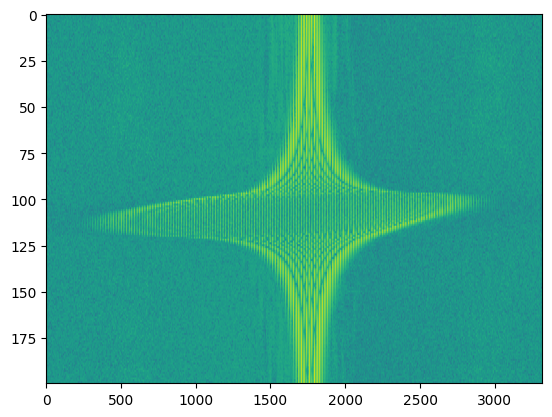

In [12]:
plt.imshow(np.log(A), aspect='auto')

In [16]:
U, S, VT = np.linalg.svd(A, full_matrices = False)

In [17]:
U.shape, S.shape, VT.shape

((200, 200), (200,), (200, 3317))

I just took random vectors with positive values to test this

In [154]:
# just some x vector
x = np.sin(np.arange(3317) / 300) ** 2

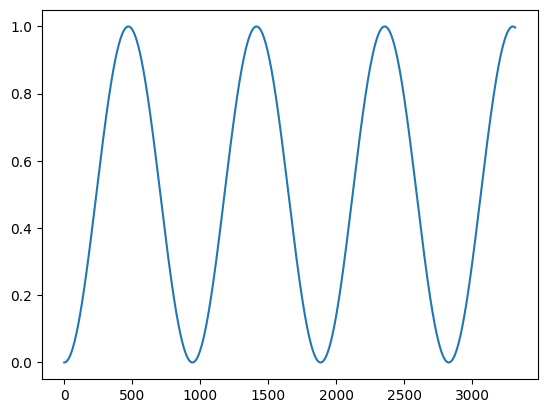

In [155]:
plt.plot(x)

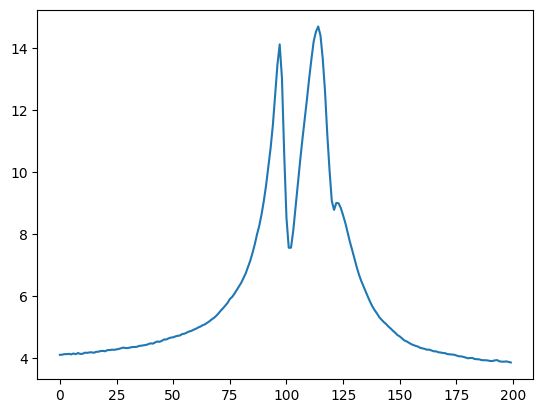

In [156]:
b = A @ x
plt.plot(b)

Inversion without regularization

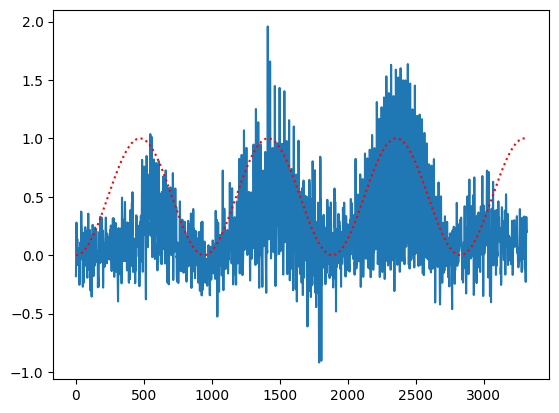

In [159]:
x_back = np.linalg.pinv(A) @ b

plt.plot(x_back)
plt.plot(x, "r:")

Tikhonov inversion:

Solve $\|Ax - b \|^2 + \lambda \|x\|^2  \to \min$

Solution is achieved by solving

$ \left( A^T A + \lambda I \right) x = A^T b$

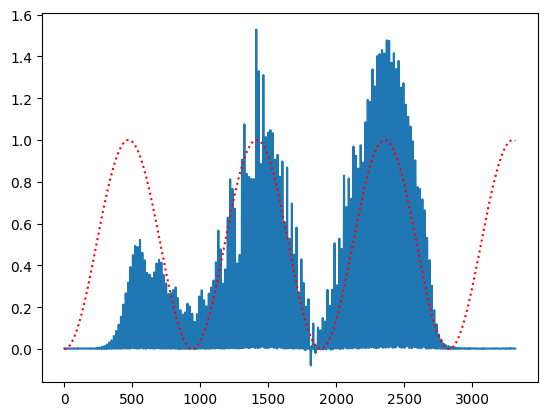

In [164]:
la = 1
x_reg = np.linalg.solve(A.T @ A + la * np.eye(A.shape[1]), A.T @ b)
plt.plot(x_reg)
plt.plot(x, "r:");

Tikhonov variant: contrain the differentiated x to reduce oscillations.


Solve $\|Ax - b \|^2 + \lambda \|Dx\|^2  \to \min$

With $D$ discrete diffential operator.

Solution is achieved by solving

$ \left( A^T A + \lambda D^T D \right) x = A^T b$

In [165]:
D = -np.eye(A.shape[1])
D = np.roll(D, 1, axis=1)
D[-1, 0 ] = 0
np.fill_diagonal(D, 1.0)

In [166]:
D

array([[ 1., -1., -0., ..., -0., -0., -0.],
       [-0.,  1., -1., ..., -0., -0., -0.],
       [-0., -0.,  1., ..., -0., -0., -0.],
       ...,
       [-0., -0., -0., ...,  1., -1., -0.],
       [-0., -0., -0., ..., -0.,  1., -1.],
       [ 0., -0., -0., ..., -0., -0.,  1.]])

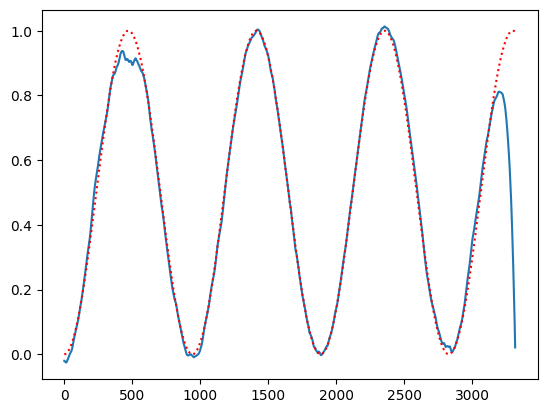

In [167]:
x_reg = np.linalg.solve(A.T @ A + 0.01 * D.T @ D, A.T @ (b ))
plt.plot(x_reg)
plt.plot(x, 'r:')

So, looks like this work. Lets add some fake noise:

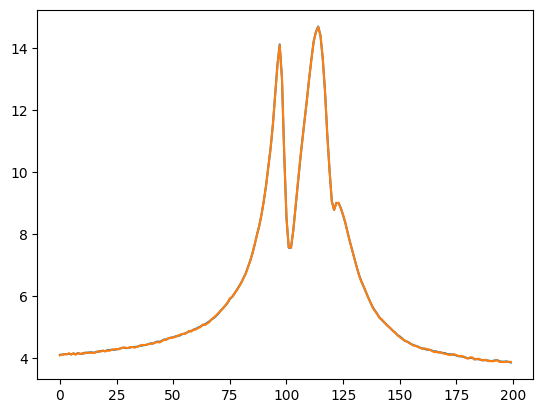

In [176]:
level = 0.05

# add random numbers in range -level/2..+level/2, so this is uniformly distributed noise
b_with_noise = b + level * (np.random.rand(*b.shape) - 0.5)
plt.plot(b)
plt.plot(b_with_noise);

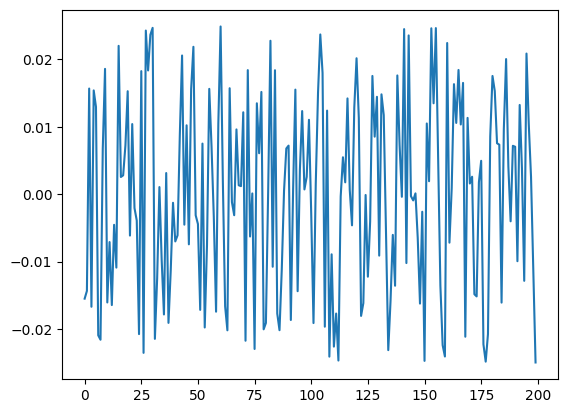

In [169]:
plt.plot(b_with_noise- b)

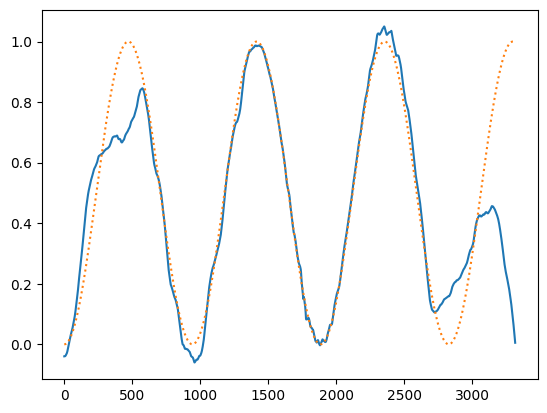

In [174]:
x_reg = np.linalg.solve(A.T @ A + 0.2 * D.T @ D, A.T @ (b_with_noise ))
plt.plot(x_reg)
plt.plot(x, ':');

1.5308732987627114


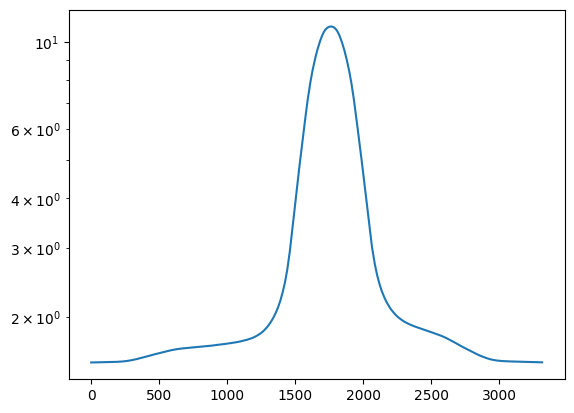

In [266]:
from scipy.signal import savgol_filter

weights = savgol_filter(np.sum(A, axis=0) + 1 * 1.5, 351, 1)
weights = savgol_filter(weights, 151, 1)

print(np.min(weights))

plt.semilogy(weights)

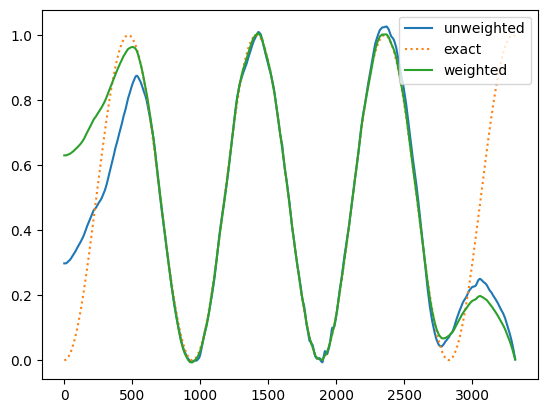

In [267]:
# plt.plot(weights)
W = np.diag(weights)
Winv = np.diag(1 / np.diag(W))

W.shape, Winv.shape


x_reg = W @ np.linalg.solve(W.T @ A.T @ A @ W + 0.5 * W.T @ D.T @ D @ W, W.T @ A.T @ (b_with_noise ))

plt.figure()
plt.plot(x_reg, label = 'unweighted')
plt.plot(x, ':', label='exact');

x_reg_weighted = np.linalg.solve(A.T @ A + 0.5 *  W.T @ D.T @ D @ W, A.T @ (b_with_noise ))
plt.plot(x_reg_weighted, label='weighted')

plt.legend();